# Build a plot over line

Requires:
- A VTK file for a given timestep
- A line segment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pyvista as pv
import os, subprocess, pickle
import pickle

In [2]:
REPO_PATH = subprocess.check_output(['git', 'rev-parse', '--show-toplevel']).decode('utf-8').strip()
plt.style.use(f'{REPO_PATH}/misc/edwin.mplstyle')

In [3]:
## Pyvista global settings
pv.set_plot_theme("document")
pv.set_jupyter_backend('static')
#pv.set_jupyter_backend('ipygany')
pv.global_theme.transparent_background = False
pv.global_theme.show_scalar_bar = True

In [10]:
#vtkfile = os.path.join(REPO_PATH,"notebooks/HighDOC_NonZeroStart/2.0NonZeroInitCondition_7152.vtk")
vtkfile = os.path.join(REPO_PATH,"notebooks/HighDOC_NonZeroStart/2.1NonZeroLESRun_22100222.vtk")

#vtkfile = os.path.join(REPO_PATH,"notebooks/LowDOC_reviewInititConc_17280.vtk")

grid = pv.read(vtkfile)
#grid.set_active_scalars('O2',preference='point')

xLineCoord = 0.01
dataLine = grid.sample_over_line((xLineCoord, grid.bounds[2], 0.1),(xLineCoord, grid.bounds[3], 0.1),resolution=100)

In [11]:
listOfSpecies = ['O2','DOC','NO3','NH4']
listOfAliveBiomass = ['XAR','XN','XDN']
listOfDeadBiomass  = ['EPS','XI']

depthArray = np.where(dataLine['vtkValidPointMask'],dataLine['Distance'],np.NaN)

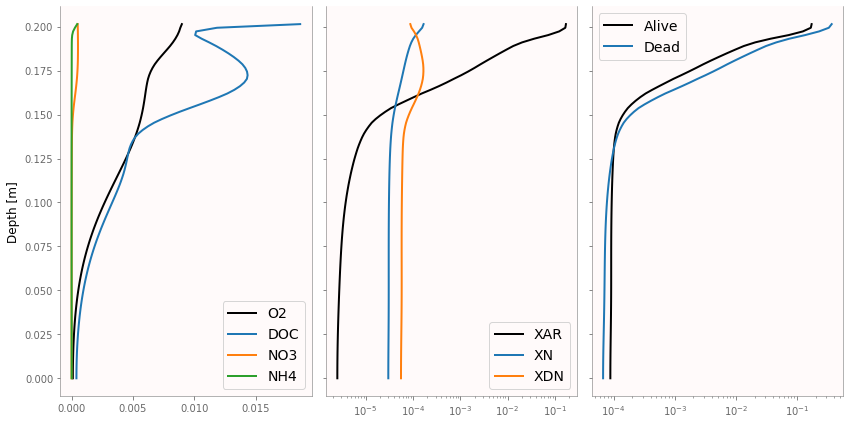

0

In [12]:
fig,axs = plt.subplots(1,3,sharey=True,figsize=[12,6])

ax = axs[0]
for chem in listOfSpecies:
    ax.plot(dataLine[chem],depthArray,label=chem)
ax.legend()

ax = axs[1]
for bio in listOfAliveBiomass:
    ax.plot(dataLine[bio],depthArray,label=bio)
ax.set(xscale='log')
ax.legend()

ax = axs[2]
totalAlive = dataLine['XAR'] + dataLine['XN'] + dataLine['XDN']
totalDead  = dataLine['EPS'] + dataLine['XI']
ax.plot(totalAlive,depthArray,label='Alive')
ax.plot(totalDead,depthArray,label='Dead')
ax.set(xscale='log')
ax.legend()

fig.supylabel('Depth [m]')
fig.tight_layout()

fileForPNG = (vtkfile.split('/')[-1]).split('.')[0] + ".png"
plt.savefig(fileForPNG)
plt.show()
os.system(f"xclip -se c -t image/png -i {fileForPNG}")


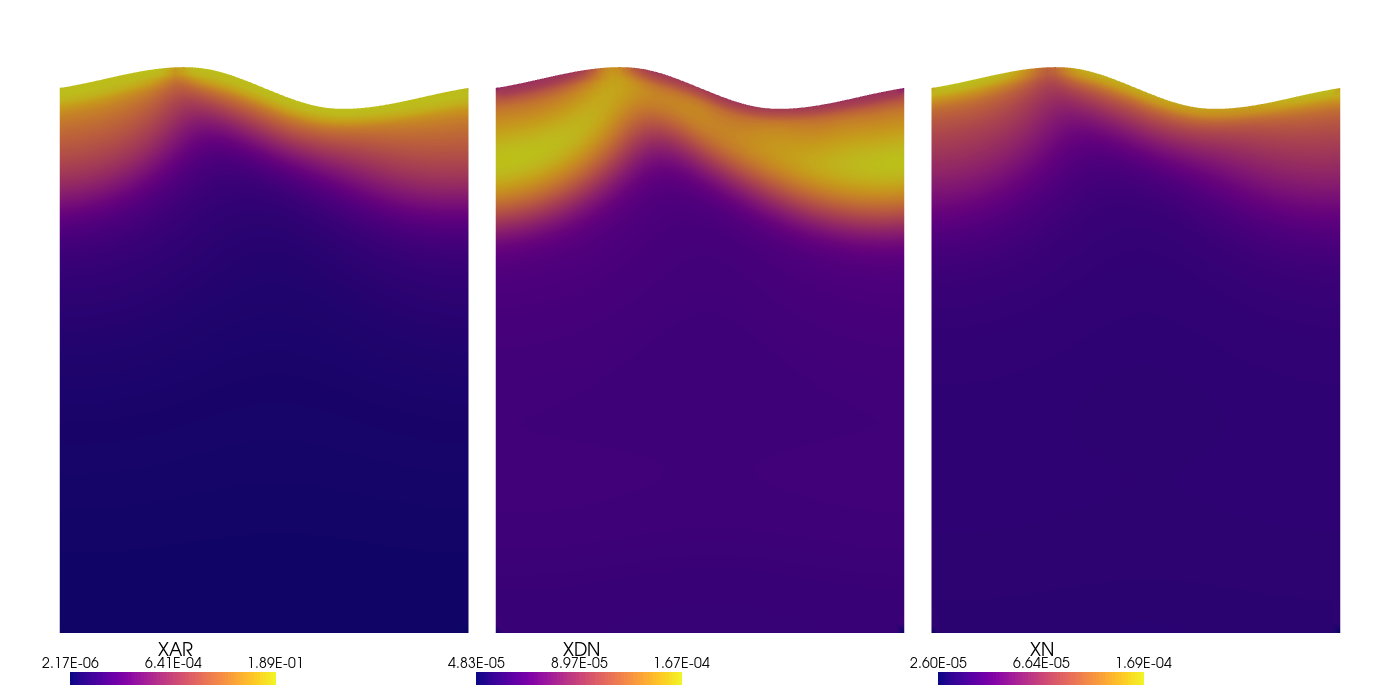

In [13]:
colorbar_kw = dict(width=0.15, height=0.05, position_y=0.02, fmt='%.2E', label_font_size=14, n_labels=3)
addmesh_kw  = dict(log_scale=True, cmap='plasma', show_scalar_bar=True)

plotter = pv.Plotter(window_size=[1400,700])
slice_xar = grid.slice(normal='z')
slice_xar.set_active_scalars('XAR',preference='point')
colorbar_kw['position_x'] = 0.05
plotter.add_mesh(slice_xar, scalars='XAR', 
                 scalar_bar_args=colorbar_kw, **addmesh_kw)
#plotter.add_text("XAR",position=(233,650),font_size=12)

slice_xdn = grid.slice(normal='z')
slice_xdn.translate((0.16, 0, 0), inplace=True)
slice_xdn.set_active_scalars('XDN',preference='point')
colorbar_kw['position_x'] = 0.34
plotter.add_mesh(slice_xdn, scalars='XDN',
                 scalar_bar_args=colorbar_kw, **addmesh_kw)
#plotter.add_text("XDN",position=(700,650),font_size=12)

slice_xn = grid.slice(normal='z')
slice_xn.translate((0.32, 0, 0), inplace=True)
slice_xn.set_active_scalars('XN',preference='point')
colorbar_kw['position_x'] = 0.67
plotter.add_mesh(slice_xn, scalars='XN',
                 scalar_bar_args=colorbar_kw, **addmesh_kw)
#plotter.add_text("XN",position=(933,650),font_size=12)

plotter.view_xy()
plotter.enable_parallel_projection()
plotter.camera.zoom(2.0)
plotter.screenshot(f"vtk_{fileForPNG}",transparent_background=True)
os.system(f"xclip -se c -t image/png -i vtk_{fileForPNG}")
plotter.show()